## 1. Razón de compresión (10 puntos)

a) Crea una carpeta con 5 o más fotos de extensión .jpg en alguna ubicación en tu cuenta de drive o en tu computador (de acuerdo a donde estés trabajando).

b) Lee por completo y detalladamente la función *razonDeCompresion* (ver siguiente celda)(si lees detalladamente encontraras cosas que te sirven para resolver las preguntas de este taller e incluso próximos talleres).

c) En la función *razonDeCompresion* reemplaza `None` con la línea de código que permite agregar la razón de compresion $\frac{\text{size_unpack}}{\text{ size_pack}}$ al final de la lista "ratios". no cambies ninguna otra línea, yo uso `### START CODE HERE ###` y `### END CODE HERE ###` para identificar y calificar el código que has escrito, si lo quitas no se califica y perjudica tu nota.

In [1]:
import os
import glob

def razonDeCompresion(ruta, extension_unpaking, extension_paking):
    
    """"
    Calcula la razón de compresión unpacking/packing para todos los archivos
    ubicados en la ruta "ruta" con extensión "ext_unpacking"
  
    Arguments:
    ruta -- string con la ruta hacia los archivos de interés. 
    Ejemplo de input: 'archivos/varios/'
    ext_unpacking -- string con la extensión de los archivos de interés.
    Ejemplo de input: '.jpg'
    ext_packing -- string con la extensión de los archivos comprimidos que
    se generarán al interior de "ruta".
    Ejemplo de input: '.tar.bz2'

    Returns:
    sizes_unpacking -- list con los tamaños en Bytes de los archivos ubicados
    en la ruta "ruta" que tienen extensión "ext_unpaking"
    ratios -- list con las razones de compresión alcanzadas en cada archivo
    """

# inicializar listas donde se almacenarán los ratios y sizes_unpacking
    ratios = []
    sizes_unpacking = []

# construir la lista de todos los archivos en la ubicación "ruta" que
# tengan extensión "extension_unpaking" (será .jpg en este ejemplo)
    files = glob.glob(ruta + '*' + extension_unpaking)
    
#iterar a través de los elementos de "files"
    for inputfilename in files:
    
# construir el nombre del archivo comprimido
        outputfilename = os.path.splitext(inputfilename)[0] + extension_paking
    
# construir el comando de terminal que comprime los archivos
        comando = 'tar jcvf \''+ outputfilename + '\' \'' + inputfilename +'\''

# ejecutar desde python el comando de compresión
        os.system(comando)

# obtener el tamaño del archivo sin comprimir
        size_unpack = os.path.getsize(inputfilename)

# obtener el tamaño del archivo comprimido
        size_pack = os.path.getsize(outputfilename)

# agregar el elemento "size_pack" al final de la lista "sizes_unpacking"
        sizes_unpacking.append(size_pack)
    
# agregar la razón de compresion al final de la lista "ratios"
### START CODE HERE ### (approx length 1 line)
    
        ratios.append(size_unpack/size_pack)
    
### END CODE HERE ###
    
    return sizes_unpacking, ratios

d)  En la función *dibujarRatioVsSizeUnpacking* reemplaza `None` con la línea de código que permite dibujar ratios (eje y) vs SizeUnpacking (eje x) con puntos rojos sin línea que los una (opcion `'ro'` dentro de `plt.plot`)

In [2]:
import matplotlib.pyplot as plt
# descomentar la siguiente línea si desea activar el fondo oscuro en las gráficas
#plt.style.use('dark_background') 

def dibujarRatioVsSizeUnpacking(sizes_unpacking, ratios):

# dibujar ratios vs SizeUnpacking en rojo y con puntos ('ro')
### START CODE HERE ### (approx length 1 line)

    plt.plot(sizes_unpacking, ratios, 'ro')

### END CODE HERE ###

# agregar nombres a los ejes
    plt.xlabel('Tamaños de archivos sin comprimir', fontsize=11)
    plt.ylabel('Razon de compresión', fontsize=11)

# mostrar gráfica
    plt.show()

e) En ruta coloca la ruta hacia la carpeta que contiene los archivos que preparaste en la parte a). Nota que la ruta debe terminar con /

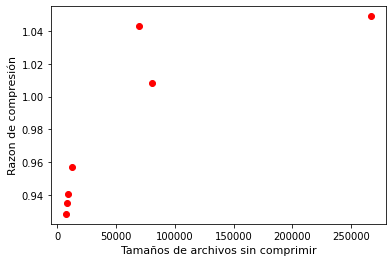

In [3]:
ruta = 'Fotos/'
ext_unpaking = '.jpg'
ext_paking = '.tar.bz2'

sizes_unpacking, ratios = razonDeCompresion(ruta, ext_unpaking, ext_paking)
dibujarRatioVsSizeUnpacking(sizes_unpacking, ratios)

El resultado esperado es la creación de los archivos comprimidos en la misma carpeta donde están las imágenes y en el cuaderno se espera que se genere una gráfica de ratios vs SizeUnpacking.

## 2. Caída libre (15 puntos)
​
a) Usando como ejemplo la forma como está escrita y documentada la función razonDeCompresion del punto anterior escribe una función llamada 
​
`evaluarTiroParabolico(t, y0, v0, a)`
​
que permita evaluar la expresión para la posición en movimiento uniformemente acelerado
$$ y = y_0 + v_0t + \frac{1}{2}at^2$$
y que retorne el valor de $y$ (borre `None` y escriba su código)
​

In [4]:
def evaluarTiroParabolico(t, y0, v0, a):
## escriba una documentación para la función aquí
    """
    Calcula la posición de un objeto que cumpla con un movimiento
    uniformemente acelerado usando la ecución conocida para ello.
  
    Arguments:
    t -- número o lista de números de tipo int o double correspondientes al tiempo, medido en segundos, 
    transcurrido desde el inicio del movimiento uniformemente acelerado. 
    Ejemplo de input: 12.5, [0, 1, 2, 3]
    
    y0 -- número de tipo int o double correspondiente a la posición inicial del objeto en movimiento, 
    medida en metros.
    Ejemplo de input: 4, 2.83
    
    v0 -- número de tipo int o double correspondiente a la velocidad inicial del objeto en movimiento,
    medida en metros sobre segundo.
    Ejemplo de input: 8, 11.98

    Returns:
    y -- número o lista de números (dependiente del tipo de entrada en t), de tipo int o double
    correspondientes a la posición resultante del objeto según los argumentos otorgados.

    """
## fin de documentación
  
### START CODE HERE ### (approx length 1 line)
    
    y = y0 + v0*t + 0.5*a*(t**2)

### END CODE HERE ###
    
    return y

b) Escribe una función llamada 
`raicesTiroParabolico(y0, v0, a)`
que encuentre los tiempos para los que $y$ vale $0$ calculando las raíces de $$ 0 = y_0 + v_0t + \frac{1}{2}at^2$$
con las expresiones
$$t_1 = \frac{-v_0+\sqrt{v_0^2-4(\frac{1}{2}a)y_0}}{2(\frac{1}{2}a)}$$
 y 
 $$t_2 = \frac{-v_0-\sqrt{v_0^2-4(\frac{1}{2}a)y_0}}{2(\frac{1}{2}a)} $$

 (simplifica las fracciones en la implementación) y que retorne el valor el valor de $t_1$ y $t_2$  (borre donde diga None y escriba su código)


In [5]:
def raicesTiroParabolico(y0, v0, a):
## escriba una documentación para la función aquí
    """


    """
## fin de documentación

### START CODE HERE ### (approx length 3 lines)
    
    discriminante = v0**2 - 2*a*y0
    t1 = (-v0 +(discriminante)**0.5)/a
    t2 = (-v0 -(discriminante)**0.5)/a

### END CODE HERE ###
    
    return t1, t2


c) Escribe una función llamada dibujarTiroParabolico(t_a, t_b, y0, v0, a) que dibuje la gráfica de tiro parabólico creando un array con los tiempos usando la función linspace de numpy

In [21]:
import numpy as np

def dibujarTiroParabolico(t_a, t_b, y0, v0, a):
## escriba una documentación para la función aquí
    """


    """
## fin de documentación

### START CODE HERE ### (approx length 6 lines)
    
    # array equiespaciado de tiempos desde t_a hasta t_b (linspace)
    t = np.linspace(t_a, t_b, 100)
    
    # evaluar tiro parabólico (usar la función evaluarTiroParabolico)
    y = evaluarTiroParabolico(t, y0, v0, a)
    
    # dibujar tiro parabólico con puntos azules ('bo')
    plt.plot(t, y, 'bo')
    
    # agregar nombres a los ejes con unidades incluidas
    plt.xlabel('tiempo $[s]$', fontsize=11)
    plt.ylabel('Posición $[m]$', fontsize=11)
    
    # mostrar gráfica
    plt.show()

### END CODE HERE ###

Corre el siguiente código para calcular los tiempos $t_1$ y $t_2$ que hacen $y=0m$ con las condiciones iniciales $y_0=10m$, $v_0=60m/s$ y $a=-9.8m/s^2$ 

In [22]:
y0 = 10  #[m]
v0 = 60  #[m/s]
a = -9.8 #[m/s^2]
 
t1, t2 = raicesTiroParabolico(y0, v0, a)
print("tiempo 1: ", t1)
print("tiempo 2: ", t2)

tiempo 1:  -0.16445787785688282
tiempo 2:  12.409355837040554


Dibuja el tiro parabólico ejecutando la siguiente celda

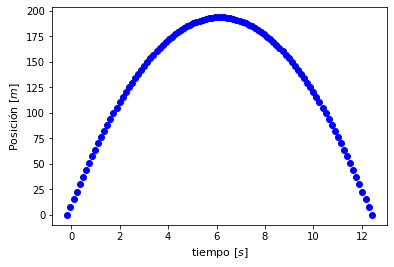

In [23]:
tiempos = [t1, t2]

# ordenar tiempos t1 y t2 (en realidad no hace falta ordenarlos)
tiempos.sort()
dibujarTiroParabolico(tiempos[0], tiempos[1], y0, v0, a)

Debes obtener una parábola cóncava y evaluada de forma simétrica respecto a un eje vertical.